# Handwritten digits

## Part 1) Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).

----------------------------------------------------------------------------------------------------------------

### My solution:

First I load the data from $\texttt{scikit.learn}$ and import all the packages I need. 

In [18]:
from sklearn import datasets
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np


digits = datasets.load_digits()
print(digits.images.shape) # look for the shape to learn how they're packed
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


Read the description of the data I took: 

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

So we have 1797 samples in 64 dimensions. I start by reducing the dimensions of the data attributes to 2 (in a way I can plot them and understand what the compiler is doing).

In [3]:
X, y = datasets.load_digits(return_X_y=True)

embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X[:])

In [4]:
X.shape # check on the shape to understand how it reduced them

(1797, 64)

In [5]:
X_transformed.shape

(1797, 2)

The 64-dimensional array was reduced to a 2-features array that I can now plot. We discussed how these features are not easy to compare or understand as it would be for instance with the length of the sepal of the flowers from the lecture example. 

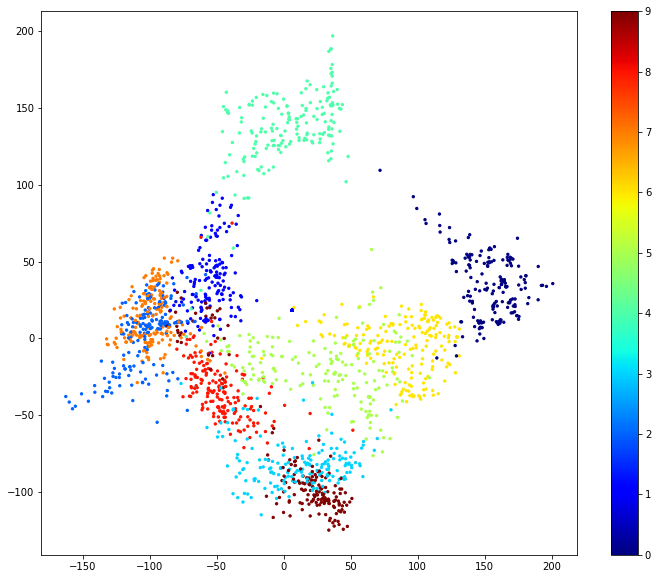

In [6]:
plt.figure(figsize=(12,10))

#D_id_color = {'0': u'red', '1': u'tomato', '2': u'chocolate', '3': u'orange', '4': u'gold', '5': u'olive', '6' : u'forestgreen', '7' : u'mediumseagreen', '8' : u'mediumaquamarine', '9' : u'mediumturquoise'}
#color_map = [color for color in D_id_color.values()[:len(y)]]

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, s=5.5, cmap='jet')
plt.colorbar();

Since it is unsupervised I should not be able to set a colormap distinguishing the numbers the "correct" way, however it was useful for me to actually see how some numbers could be easily confused with others.

## Part 2) Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

----------------------------------------------------------------------------------------------------------------

### My solution

To split the dataset as required by point 4) I use the command we saw from lecture L13. 

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.8)

In [8]:
lr = LogisticRegression(solver='sag', max_iter=100000)

In [9]:
lr.fit(Xtrain, ytrain)  # doing a fit 

LogisticRegression(max_iter=100000, solver='sag')

I print the fit parameters just to see how it works: 

In [11]:
print("coeff:", lr.coef_)
print("intercept:", lr.intercept_)

[[ 0.00000000e+00 -2.22585547e-03  2.78528570e-03  8.17800989e-02
   4.81689514e-03 -5.70815255e-02 -3.12984613e-02 -5.73566954e-04
  -5.60048961e-06 -9.15562050e-03  9.19897076e-03  2.71966417e-02
   2.25946284e-02  1.34475703e-01 -4.63892031e-02 -1.52095258e-03
  -8.33321916e-04  3.01241978e-02  4.48360757e-02 -8.76628352e-03
  -1.85410559e-01  1.25955455e-01  9.98722951e-03 -5.47262249e-04
  -4.15797615e-04  1.18291364e-01  7.60556573e-02 -5.18016534e-02
  -2.94529515e-01  1.65833274e-03 -4.18560848e-03 -5.31969480e-04
   0.00000000e+00  1.16681234e-01  9.68381793e-02 -1.60919676e-01
  -2.24377111e-01  1.43218843e-02  4.99056318e-02  0.00000000e+00
  -1.06510313e-03 -1.23909265e-02  2.15153668e-01 -1.26022218e-01
  -9.33973089e-02  3.45956951e-02  5.15117118e-02 -1.03333212e-04
  -4.26641533e-03 -4.16845981e-02  5.92760529e-02 -5.24713463e-03
   6.02923524e-02  5.04771307e-02 -1.14335264e-02 -2.63927093e-03
  -3.48280518e-06 -2.11341304e-03 -2.27724569e-02  8.35347865e-02
   1.19942

Then, I produce the prediction of future points based on the X-data I have. The algorithm learns and places these new points based on what it knows from the previously given database. 

In [12]:
ypred_test = lr.predict(Xtest)
ypred_train = lr.predict(Xtrain)
ypred = lr.predict(X)

I run an accuracy test to see the fraction of corrected labeled points. 

In [13]:
acc_test = accuracy_score(ytest, ypred_test)
acc_train = accuracy_score(ytrain, ypred_train)
acc = accuracy_score(y, ypred)

In [14]:
print("test accuracy: ", acc_test)
print("train accuracy: ", acc_train)
print("accuracy: ", acc)

test accuracy:  0.9541029207232267
train accuracy:  1.0
accuracy:  0.9632721202003339


The test accuracy is up to 95% (it was actually the only one that really mattered in terms of the accuracy).

I now try to use the confusion matrix, which will help me understand ***where*** it's gone wrong. 

## Confusion

In [16]:
print(confusion_matrix(ytest, ypred_test))

[[145   0   0   0   1   1   0   0   0   0]
 [  0 131   0   0   2   0   2   0   6   0]
 [  0   1 140   3   0   0   0   0   0   0]
 [  0   0   0 136   0   3   0   4   5   1]
 [  0   1   0   0 141   0   0   0   0   2]
 [  0   1   0   0   1 146   1   0   0   1]
 [  0   3   0   0   0   0 145   0   1   0]
 [  0   0   0   0   1   0   0 132   1   2]
 [  0   5   1   0   0   1   1   0 125   0]
 [  0   2   0   4   0   4   0   0   4 131]]


/var/folders/x1/_4_0wf6n3vbb18gn1psjd98w0000gn/T/ipykernel_32186/766060208.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(ytest, ypred_test)),


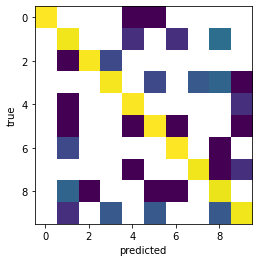

In [21]:
plt.imshow(np.log(confusion_matrix(ytest, ypred_test)), 
           cmap='viridis', interpolation='nearest')
plt.ylabel('true')
plt.xlabel('predicted');

The elements outside the diagonal of the ***covariance matrix*** give me information in terms of "*the number of observations known to be in row-$i$ and predicted to be in column-$j$*". This means that: 

- The 0 value is one of the least confused values in the whole group, as well as the value 4;
- The values 8 and 9 are easily confused with others (2 or even 5).

This in a way matches the plot I produce above, where the only values that are really distinguishable from one another are 0 and 4. The others are much more mixed, making it difficult to label them easily. 